<a href="https://colab.research.google.com/github/tatianaeng/BudgetAnalysis/blob/master/Code_Boston_Celtics_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ORLANDO
# display all of the data from the celtics games (include opponents)
# import the pandas library as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# refer to the CSV URL as the variable data_URL
data_URL = "https://raw.githubusercontent.com/orlandojmarin/BostonCelticsChampionshipRun/refs/heads/main/BostonCelticsDatasetPredictions.csv"

df = pd.read_csv(data_URL)

# show all 164 rows of data
df.head(164)

,Date,Team,Location,FGA,FG%,3PA,3P%,FTA,FT%,ORB,...,TRB,AST,STL,BLK,TOV,PF,PTS,Result,Predicted_PTS,Predicted_Result
0,10/25/2023,Celtics,Away,77,0.481,39,0.308,26,0.846,7,...,46,18,6,11,13,22,108,W,111,W
1,10/25/2023,Knicks,Home,97,0.371,41,0.439,26,0.538,17,...,47,24,9,0,11,22,104,L,102,L
2,10/27/2023,Celtics,Home,95,0.474,39,0.410,19,0.684,16,...,55,20,7,6,15,19,119,W,118,W
3,10/27/2023,Heat,Away,89,0.427,33,0.485,23,0.826,11,...,45,24,8,6,12,16,111,L,111,L
4,10/30/2023,Celtics,Away,102,0.500,53,0.358,7,0.714,15,...,51,31,11,6,18,21,126,W,125,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,4/11/2024,Knicks,Away,99,0.495,36,0.389,10,0.600,17,...,52,24,7,4,15,12,118,W,119,W
160,4/12/2024,Celtics,Home,104,0.519,41,0.341,13,0.692,16,...,53,34,12,1,6,20,131,W,128,W
161,4/12/2024,Hornets,Away,76,0.421,35,0.429,22,0.864,4,...,33,20,3,7,20,15,98,L,101,L
162,4/14/2024,Celtics,Home,89,0.573,32,0.500,21,0.667,10,...,48,29,10,15,17,13,132,W,134,W


In [ ]:
# ORLANDO
# filter the data to rows where the team is "celtics"
celticsData = df.loc[df['Team'] == "Celtics", : ]
celticsData

,Date,Team,Location,FGA,FG%,3PA,3P%,FTA,FT%,ORB,...,TRB,AST,STL,BLK,TOV,PF,PTS,Result,Predicted_PTS,Predicted_Result
0,10/25/2023,Celtics,Away,77,0.481,39,0.308,26,0.846,7,...,46,18,6,11,13,22,108,W,111,W
2,10/27/2023,Celtics,Home,95,0.474,39,0.410,19,0.684,16,...,55,20,7,6,15,19,119,W,118,W
4,10/30/2023,Celtics,Away,102,0.500,53,0.358,7,0.714,15,...,51,31,11,6,18,21,126,W,125,W
6,11/1/2023,Celtics,Home,95,0.568,35,0.571,28,0.964,11,...,57,27,5,2,13,19,155,W,145,W
8,11/4/2023,Celtics,Away,90,0.478,45,0.333,27,0.852,10,...,50,22,4,6,11,17,124,W,117,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,4/7/2024,Celtics,Home,87,0.563,38,0.421,13,0.769,5,...,40,34,11,8,13,12,124,W,126,W
156,4/9/2024,Celtics,Away,93,0.398,52,0.327,0,0.000,12,...,38,27,11,4,12,8,91,L,94,L
158,4/11/2024,Celtics,Home,86,0.465,42,0.381,16,0.813,10,...,36,25,7,12,12,16,109,L,112,L
160,4/12/2024,Celtics,Home,104,0.519,41,0.341,13,0.692,16,...,53,34,12,1,6,20,131,W,128,W


In [ ]:
# ORLANDO
# calculate the averages for the celtics in each category
celticsData.describe()

,FGA,FG%,3PA,3P%,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Predicted_PTS
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,90.195122,0.487659,42.463415,0.387598,20.170732,0.795890,10.682927,35.646341,46.329268,26.914634,6.792683,6.560976,11.939024,16.170732,120.573171,119.512195
std,6.735641,0.052396,6.359973,0.076738,7.636502,0.131897,3.596562,5.901186,6.944320,4.638010,2.720466,2.837568,3.382408,3.523483,12.354867,10.361662
min,74.000000,0.360000,22.000000,0.227000,0.000000,0.000000,4.000000,25.000000,31.000000,17.000000,1.000000,1.000000,3.000000,8.000000,91.000000,94.000000
25%,86.250000,0.453500,38.250000,0.333000,13.250000,0.727750,8.000000,31.250000,42.250000,24.000000,5.000000,4.250000,10.000000,13.000000,114.000000,113.250000
50%,91.000000,0.489000,42.000000,0.386000,19.500000,0.815500,11.000000,36.000000,46.000000,27.000000,6.500000,6.000000,12.000000,16.000000,120.000000,119.000000
75%,94.000000,0.523500,47.000000,0.437500,25.750000,0.871500,13.000000,40.000000,52.000000,30.000000,8.750000,8.750000,14.000000,19.000000,128.000000,126.000000
max,114.000000,0.638000,58.000000,0.571000,37.000000,1.000000,18.000000,48.000000,58.000000,36.000000,14.000000,15.000000,20.000000,26.000000,155.000000,145.000000


In [ ]:
# ORLANDO
# filter the data to rows where the team is "celtics" and the location is "home"
celticsHomeData = df.loc[(df['Team'] == "Celtics") & (df["Location"] == "Home"), : ]
celticsHomeData

,Date,Team,Location,FGA,FG%,3PA,3P%,FTA,FT%,ORB,...,TRB,AST,STL,BLK,TOV,PF,PTS,Result,Predicted_PTS,Predicted_Result
2,10/27/2023,Celtics,Home,95,0.474,39,0.410,19,0.684,16,...,55,20,7,6,15,19,119,W,118,W
6,11/1/2023,Celtics,Home,95,0.568,35,0.571,28,0.964,11,...,57,27,5,2,13,19,155,W,145,W
14,11/10/2023,Celtics,Home,94,0.436,52,0.365,28,0.714,17,...,52,29,5,3,8,13,121,W,117,W
16,11/11/2023,Celtics,Home,86,0.547,44,0.341,13,0.615,5,...,46,30,1,4,13,14,117,W,127,W
18,11/13/2023,Celtics,Home,79,0.506,43,0.442,16,0.938,8,...,37,27,3,3,11,22,114,W,113,W
28,11/22/2023,Celtics,Home,84,0.524,42,0.405,17,0.824,4,...,43,27,3,5,15,15,119,W,119,W
32,11/26/2023,Celtics,Home,95,0.442,47,0.277,20,0.800,18,...,58,24,9,3,13,19,113,W,114,W
34,11/28/2023,Celtics,Home,90,0.522,49,0.429,12,0.750,11,...,52,36,6,9,16,18,124,W,125,W
36,12/1/2023,Celtics,Home,77,0.506,33,0.485,36,0.861,10,...,46,25,10,8,20,18,125,W,122,W
40,12/8/2023,Celtics,Home,91,0.527,47,0.404,21,0.857,8,...,34,24,8,5,8,19,133,W,121,W


In [ ]:
# ORLANDO
# calculate the averages for the celtics home games in each category
celticsHomeData.describe()

,FGA,FG%,3PA,3P%,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Predicted_PTS
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,90.414634,0.497195,42.219512,0.402317,19.560976,0.828415,10.585366,36.634146,47.219512,27.048780,7.000000,6.536585,11.926829,16.439024,123.146341,121.634146
std,6.107273,0.049724,6.206900,0.079850,7.602792,0.098504,3.667258,6.019784,7.205943,4.614928,2.983287,3.033954,3.212400,3.194126,11.892353,9.878654
min,74.000000,0.360000,22.000000,0.227000,7.000000,0.615000,4.000000,25.000000,33.000000,18.000000,1.000000,1.000000,3.000000,9.000000,96.000000,100.000000
25%,87.000000,0.465000,39.000000,0.347000,13.000000,0.750000,8.000000,33.000000,43.000000,24.000000,5.000000,4.000000,10.000000,14.000000,117.000000,117.000000
50%,90.000000,0.506000,43.000000,0.409000,19.000000,0.833000,10.000000,38.000000,48.000000,27.000000,7.000000,6.000000,12.000000,16.000000,124.000000,121.000000
75%,95.000000,0.528000,47.000000,0.472000,25.000000,0.889000,12.000000,40.000000,53.000000,30.000000,9.000000,9.000000,14.000000,19.000000,131.000000,127.000000
max,104.000000,0.573000,52.000000,0.571000,37.000000,1.000000,18.000000,47.000000,58.000000,36.000000,14.000000,15.000000,20.000000,23.000000,155.000000,145.000000


In [ ]:
# ORLANDO
# filter the data to rows where the team is "celtics" and the location is "away"
celticsAwayData = df.loc[(df['Team'] == "Celtics") & (df["Location"] == "Away"), : ]
celticsAwayData

,Date,Team,Location,FGA,FG%,3PA,3P%,FTA,FT%,ORB,...,TRB,AST,STL,BLK,TOV,PF,PTS,Result,Predicted_PTS,Predicted_Result
0,10/25/2023,Celtics,Away,77,0.481,39,0.308,26,0.846,7,...,46,18,6,11,13,22,108,W,111,W
4,10/30/2023,Celtics,Away,102,0.500,53,0.358,7,0.714,15,...,51,31,11,6,18,21,126,W,125,W
8,11/4/2023,Celtics,Away,90,0.478,45,0.333,27,0.852,10,...,50,22,4,6,11,17,124,W,117,W
10,11/6/2023,Celtics,Away,92,0.391,39,0.282,34,0.765,11,...,45,20,13,2,18,26,109,L,106,L
12,11/8/2023,Celtics,Away,91,0.396,47,0.319,19,0.842,9,...,43,28,8,6,13,13,103,L,102,L
20,11/15/2023,Celtics,Away,88,0.477,50,0.360,19,0.789,12,...,45,23,7,8,10,15,117,W,118,W
22,11/17/2023,Celtics,Away,92,0.457,46,0.348,9,0.889,8,...,44,29,5,4,11,13,108,W,111,W
24,11/19/2023,Celtics,Away,77,0.455,31,0.387,25,0.800,9,...,45,20,6,10,17,19,102,W,108,W
26,11/20/2023,Celtics,Away,97,0.433,50,0.320,28,0.643,11,...,48,19,6,8,15,15,118,L,113,L
30,11/24/2023,Celtics,Away,76,0.408,29,0.241,37,0.730,4,...,31,17,10,4,15,18,96,L,98,L


In [ ]:
# ORLANDO
# calculate the averages for the celtics away games in each category
celticsAwayData.describe()

,FGA,FG%,3PA,3P%,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Predicted_PTS
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,89.975610,0.478122,42.707317,0.372878,20.780488,0.763366,10.780488,34.658537,45.439024,26.780488,6.585366,6.585366,11.951220,15.902439,118.000000,117.390244
std,7.380677,0.053856,6.577400,0.071446,7.715284,0.152830,3.567297,5.681592,6.640967,4.714404,2.449241,2.664354,3.584349,3.845809,12.413702,10.516364
min,76.000000,0.374000,29.000000,0.241000,0.000000,0.000000,4.000000,25.000000,31.000000,17.000000,1.000000,1.000000,3.000000,8.000000,91.000000,94.000000
25%,86.000000,0.451000,38.000000,0.320000,17.000000,0.714000,8.000000,31.000000,42.000000,24.000000,5.000000,5.000000,10.000000,13.000000,109.000000,111.000000
50%,91.000000,0.479000,41.000000,0.362000,21.000000,0.773000,11.000000,34.000000,45.000000,27.000000,6.000000,6.000000,12.000000,16.000000,118.000000,118.000000
75%,94.000000,0.511000,47.000000,0.408000,27.000000,0.846000,13.000000,39.000000,51.000000,30.000000,8.000000,8.000000,14.000000,18.000000,126.000000,125.000000
max,114.000000,0.638000,58.000000,0.550000,37.000000,0.950000,18.000000,48.000000,57.000000,36.000000,13.000000,12.000000,18.000000,26.000000,145.000000,144.000000


In [ ]:
# ORLANDO
# filter the data to rows where the team is not "celtics"
opponentsData = df.loc[df['Team'] != "Celtics", : ]
opponentsData

,Date,Team,Location,FGA,FG%,3PA,3P%,FTA,FT%,ORB,...,TRB,AST,STL,BLK,TOV,PF,PTS,Result,Predicted_PTS,Predicted_Result
1,10/25/2023,Knicks,Home,97,0.371,41,0.439,26,0.538,17,...,47,24,9,0,11,22,104,L,102,L
3,10/27/2023,Heat,Away,89,0.427,33,0.485,23,0.826,11,...,45,24,8,6,12,16,111,L,111,L
5,10/30/2023,Wizards,Home,87,0.448,36,0.306,26,0.692,11,...,40,26,12,4,15,13,107,L,106,L
7,11/1/2023,Pacers,Away,101,0.455,37,0.135,12,0.583,8,...,31,26,6,6,9,20,104,L,107,L
9,11/4/2023,Nets,Home,100,0.430,52,0.327,17,0.647,10,...,42,22,4,5,6,21,114,L,110,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,4/7/2024,Trail Blazers,Away,102,0.392,38,0.368,13,1.000,22,...,53,26,8,2,15,12,107,L,104,L
157,4/9/2024,Bucks,Home,81,0.531,36,0.472,2,0.500,10,...,49,29,6,5,18,4,104,W,123,W
159,4/11/2024,Knicks,Away,99,0.495,36,0.389,10,0.600,17,...,52,24,7,4,15,12,118,W,119,W
161,4/12/2024,Hornets,Away,76,0.421,35,0.429,22,0.864,4,...,33,20,3,7,20,15,98,L,101,L


In [ ]:
# ORLANDO
# calculate the averages for all of the celtics opponents in each category
opponentsData.describe()

,FGA,FG%,3PA,3P%,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Predicted_PTS
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.00000,82.000000,82.000000,82.000000
mean,91.646341,0.453622,36.682927,0.349305,17.341463,0.771280,11.060976,32.256098,43.317073,24.902439,6.219512,3.707317,12.02439,17.268293,109.231707,110.609756
std,7.020907,0.046270,6.132041,0.088226,5.604715,0.129376,3.850116,5.139561,7.112635,4.284943,2.841597,2.045699,3.98756,4.661502,10.441251,8.849574
min,76.000000,0.362000,21.000000,0.125000,2.000000,0.500000,3.000000,20.000000,28.000000,15.000000,0.000000,0.000000,5.00000,4.000000,86.000000,91.000000
25%,87.000000,0.421250,33.000000,0.295500,13.000000,0.677500,9.000000,29.000000,39.000000,21.250000,4.000000,2.000000,9.00000,14.000000,102.000000,104.000000
50%,91.500000,0.453000,36.000000,0.353000,17.000000,0.769000,10.000000,32.000000,42.000000,25.000000,6.000000,3.000000,12.00000,17.000000,107.500000,110.000000
75%,95.000000,0.481000,40.000000,0.405750,21.750000,0.873000,13.000000,35.750000,47.750000,28.000000,8.000000,5.000000,14.75000,21.000000,115.750000,117.000000
max,109.000000,0.573000,53.000000,0.528000,34.000000,1.000000,22.000000,44.000000,59.000000,36.000000,16.000000,10.000000,24.00000,28.000000,135.000000,134.000000


In [ ]:
# ORLANDO
# Predictions
# Use Random Forest (on celticsData) to predict PTS based off of
# FGA, 3PA, FTA, ORB, DRB, TRB, AST, STL, BLK, TOV, PF

### NOTE: this cell looks at field goal, 3-point, free throw ATTEMPTS ###

X1 = df.loc[:, ["FGA", "3PA", "FTA", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF"]]
Y1 = df.loc[:, 'PTS']

# Generate the train and test sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state=1)

# Create the model
rf_regr_attempts = RandomForestRegressor(max_depth=6, random_state=0)

# Train the model
rf_regr_attempts.fit(X1_train, Y1_train)

# Make predictions
y_pred = rf_regr_attempts.predict(X1_test)

# Evaluate
print('R squared: ', rf_regr_attempts.score(X1_test, Y1_test))

R squared:  0.4720995133328969


In [ ]:
# ASIA
# CALCULATE FEATURE IMPORTANCE FOR RANDOM FOREST 1 (uses shot attempts, not percentages)

df_numeric = df[["FGA", "3PA", "FTA", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF"]]

cols = df_numeric.columns
feature_imp = pd.Series(data = rf_regr_attempts.feature_importances_, index = df_numeric.columns[:len(cols)])
feature_imp.sort_values(ascending = False, inplace = True)

print(feature_imp)

AST    0.360299
FTA    0.163132
DRB    0.081028
3PA    0.078838
BLK    0.076660
TRB    0.055570
PF     0.049508
TOV    0.035702
FGA    0.034633
STL    0.033499
ORB    0.031132
dtype: float64


In [ ]:
# ORLANDO
# Use Random Forest again (on celticsData) to predict PTS based off of
# FG%, 3P%, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF

### NOTE: this cell looks at field, 3-point, free throw PERCENTAGES ###

X2 = df.loc[:, ["FG%", "3P%", "FT%", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF"]]
Y2 = df.loc[:, 'PTS']

# Generate the train and test sets
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state=1)

# Create the model
rf_regr_percentages = RandomForestRegressor(max_depth=6, random_state=0)

# Train the model
rf_regr_percentages.fit(X2_train, Y2_train)

# Make predictions
y_pred = rf_regr_percentages.predict(X2_test)

# Evaluate
print('R squared: ', rf_regr_percentages.score(X2_test, Y2_test))

R squared:  0.6755366948677046


In [ ]:
# ASIA
# CALCULATE FEATURE IMPORTANCE FOR RANDOM FOREST 2 (uses shooting percentages, not attempts)

df_numeric = df[["FG%", "3P%", "FT%", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF"]]

cols = df_numeric.columns
feature_imp = pd.Series(data = rf_regr_percentages.feature_importances_, index = df_numeric.columns[:len(cols)])
feature_imp.sort_values(ascending = False, inplace = True)

print(feature_imp)

FG%    0.580813
3P%    0.094981
AST    0.072533
TRB    0.054309
ORB    0.053202
BLK    0.028384
STL    0.027784
DRB    0.025681
FT%    0.022154
TOV    0.021001
PF     0.019158
dtype: float64


In [ ]:
# ORLANDO
# QUESTION: Which Random Forest model is more accurate?
# ANSWER: Random Forest with shooting percentages (FG%, 3P%, FT%) provides a
# more accurate prediction of PTS scored by the Celtics. This is based on the
# R squared value of 0.675 for shot attempts (X1, Y1), which is significantly
# higher than the R squared value of 0.472 for shooting percentages (X2, Y2)


In [ ]:
# ORLANDO
# CREATE AN ALGORITHM TO PREDICT POINT VALUES BASED ON OUTPUTS FROM CELTICS
# GAMES USING FEATURES FROM THE STATS THAT INCLUDE SHOOTING PERCENTAGES
# RUN THIS FOR EACH GAME / TEAM WITH THE CORRESPONDING STATS (164 ROWS TOTAL)

# Manually input game stats for prediction
new_game_stats = {
    "FG%": 0.474,  # field goal percentage
    "3P%": 0.293,  # three-point percentage
    "FT%": 0.667,  # free throw percentage
    "ORB": 13,      # Offensive rebounds
    "DRB": 43,     # Defensive rebounds
    "TRB": 56,     # Total rebounds
    "AST": 27,     # Assists
    "STL": 5,      # Steals
    "BLK": 9,     # Blocks
    "TOV": 18,     # Turnovers
    "PF": 19       # Personal fouls
}

# Convert the input dictionary to a DataFrame to match the model input format
new_game_df = pd.DataFrame([new_game_stats])

# Print the features used to ensure they match
print("Prediction input features:", new_game_df.columns.tolist())
print("Training features:", X2.columns.tolist())

# Predict points scored by the Celtics or by an opponent using the trained Random Forest model
predicted_pts = rf_regr_percentages.predict(new_game_df)

# Round the predicted points to an integer for display
rounded_predicted_pts = round(predicted_pts[0])

# Output the results
print("Predicted Points Scored (original):", predicted_pts[0])
print("Predicted Points Scored (rounded):", rounded_predicted_pts)


Prediction input features: ['FG%', '3P%', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
Training features: ['FG%', '3P%', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
Predicted Points Scored (original): 115.45208468995041
Predicted Points Scored (rounded): 115


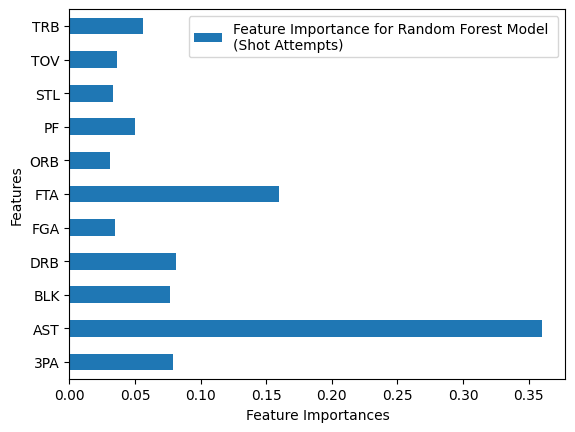

   Features  Feature Importance for Random Forest Model \n(Shot Attempts)
0       AST                                              0.360           
1       FTA                                              0.160           
2       DRB                                              0.081           
3       3PA                                              0.079           
4       BLK                                              0.077           
5       TRB                                              0.056           
6        PF                                              0.050           
7       TOV                                              0.036           
8       FGA                                              0.035           
9       STL                                              0.033           
10      ORB                                              0.031           


In [ ]:
#ASIA

dataframe = pd.DataFrame({'Features': ['AST','FTA','DRB','3PA', 'BLK', 'TRB', 'PF', 'TOV', 'FGA', 'STL','ORB'],'Feature Importance for Random Forest Model \n(Shot Attempts)':[0.36,0.16,0.081,0.079,0.077,0.056,0.050,0.036,0.035,0.033,0.031]})

dataframe.groupby('Features').mean()
ax = dataframe.groupby(['Features']).sum().plot(kind='barh', y='Feature Importance for Random Forest Model \n(Shot Attempts)')
ax.set_xlabel("Feature Importances")

'''AST    0.360299
FTA    0.163132
DRB    0.081028
3PA    0.078838
BLK    0.076660
TRB    0.055570
PF     0.049508
TOV    0.035702
FGA    0.034633
STL    0.033499
ORB    0.031132
dtype: float64'''

#fig.subplots_adjust(wspace=.2, hspace=.2)
plt.show()
print(dataframe)

#After generating the pie charts, grab image and paste on to the presentation slides.

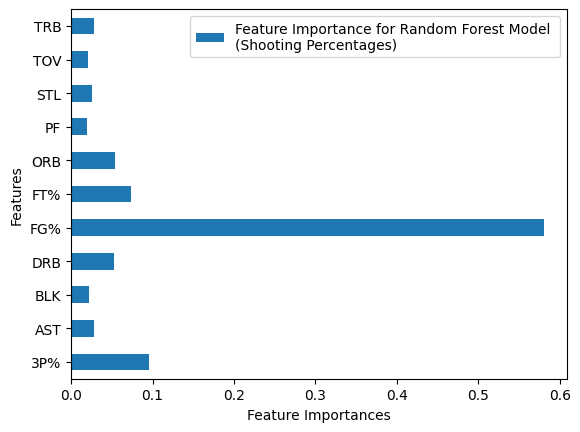

   Features  \
0       FG%   
1       3P%   
2       FT%   
3       ORB   
4       DRB   
5       TRB   
6       AST   
7       STL   
8       BLK   
9       TOV   
10       PF   

    Feature Importance for Random Forest Model \n(Shooting Percentages)  
0                                               0.580                    
1                                               0.095                    
2                                               0.073                    
3                                               0.054                    
4                                               0.053                    
5                                               0.028                    
6                                               0.028                    
7                                               0.026                    
8                                               0.022                    
9                                               0.021                    
10   

In [ ]:
#ASIA

#Visualization (2 Horizontal Bar Graphs)


import matplotlib.pyplot as plt
import pandas as pd


#For data, show and compare (side-by-side) feature importances that were found above with those pie charts

'''
FG%    0.580813
3P%    0.094981
AST    0.072533
TRB    0.054309
ORB    0.053202
BLK    0.028384
STL    0.027784
DRB    0.025681
FT%    0.022154
TOV    0.021001
PF     0.019158
dtype: float64
'''
dataframe = pd.DataFrame({'Features': ['FG%','3P%','FT%','ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV','PF'],'Feature Importance for Random Forest Model \n(Shooting Percentages)':[0.58,0.095,0.073,0.054,0.053,0.028,0.028,0.026,0.022,0.021,0.019]})

dataframe.groupby('Features').mean()
ax = dataframe.groupby(['Features']).sum().plot(kind='barh', y='Feature Importance for Random Forest Model \n(Shooting Percentages)')
ax.set_xlabel("Feature Importances")
plt.show()
print(dataframe)



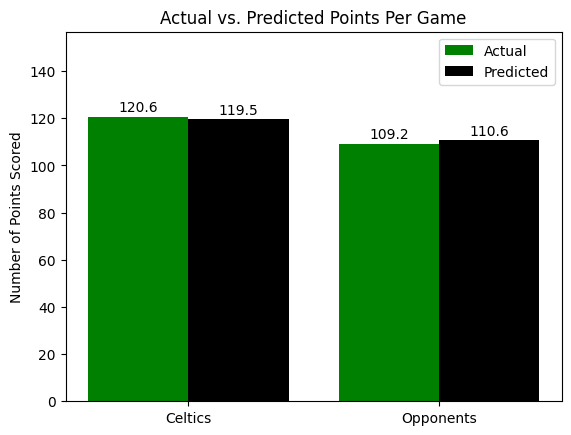

In [ ]:
# TATIANA
# create a double bar graph that shows actual mean points vs predicted mean points
# for both the celtics and their opponents

X = ["Celtics", "Opponents"]
Y_actualPointsPerGame = [120.573171, 109.231707]
Y_predictedPointsPerGame = [119.512195, 110.609756]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Y_actualPointsPerGame, 0.4, label = 'Actual', color = 'green')
plt.bar(X_axis + 0.2, Y_predictedPointsPerGame, 0.4, label = 'Predicted', color = 'black')

# add value labels above each bar for Y_actualPointsPerGame
for i, value in enumerate(Y_actualPointsPerGame):
    plt.text(X_axis[i] - 0.2, value + 1, f'{value:.1f}', ha='center', va='bottom', color='black')

# add value labels above each bar for Y_predictedPointsPerGame
for i, value in enumerate(Y_predictedPointsPerGame):
    plt.text(X_axis[i] + 0.2, value + 1, f'{value:.1f}', ha='center', va='bottom', color='black')

plt.xticks(X_axis, X)
# plt.xlabel("Groups")
plt.ylabel("Number of Points Scored")
plt.title("Actual vs. Predicted Points Per Game")
plt.legend()

# adjust the y-axis limits to "zoom out" (aka add padding)
# find the maximum value
max_value = max(max(Y_actualPointsPerGame), max(Y_predictedPointsPerGame))
# set y-axis from 0 to 30% higher than the maximum value
plt.ylim(0, max_value * 1.3)

plt.show()

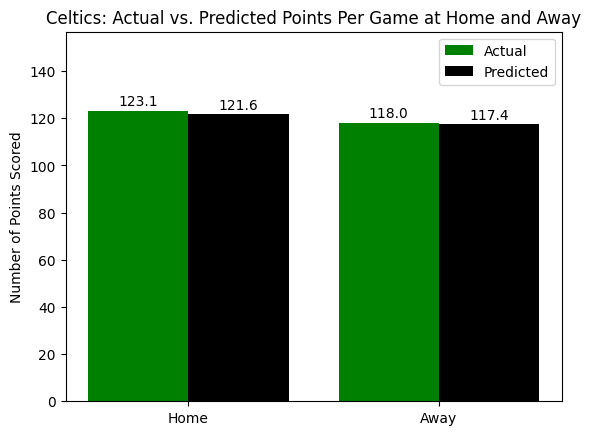

In [ ]:
# TATIANA
# create a double bar graph that shows actual points and predicted points for the celtics at home and away

X = ["Home", "Away"]
Y_celticsActualPointsPerGame = [123.146341, 118.000000]
Y_celticsPredictedPointsPerGame = [121.634146, 117.390244]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Y_celticsActualPointsPerGame, 0.4, label = 'Actual', color='green')
plt.bar(X_axis + 0.2, Y_celticsPredictedPointsPerGame, 0.4, label = 'Predicted', color='black')

# add value labels above each bar for Y_celticsActualPointsPerGame
for i, value in enumerate(Y_celticsActualPointsPerGame):
    plt.text(X_axis[i] - 0.2, value + 1, f'{value:.1f}', ha='center', va='bottom', color='black')

# add value labels above each bar for Y_celticsPredictedPointsPerGame
for i, value in enumerate(Y_celticsPredictedPointsPerGame):
    plt.text(X_axis[i] + 0.2, value + 1, f'{value:.1f}', ha='center', va='bottom', color='black')

plt.xticks(X_axis, X)
# plt.xlabel("Groups")
plt.ylabel("Number of Points Scored")
plt.title("Celtics: Actual vs. Predicted Points Per Game at Home and Away")
plt.legend()

# adjust the y-axis limits to "zoom out" (aka add padding)
# find the maximum value
max_value = max(max(Y_actualPointsPerGame), max(Y_predictedPointsPerGame))
# set y-axis from 0 to 30% higher than the maximum value
plt.ylim(0, max_value * 1.3)

plt.show()

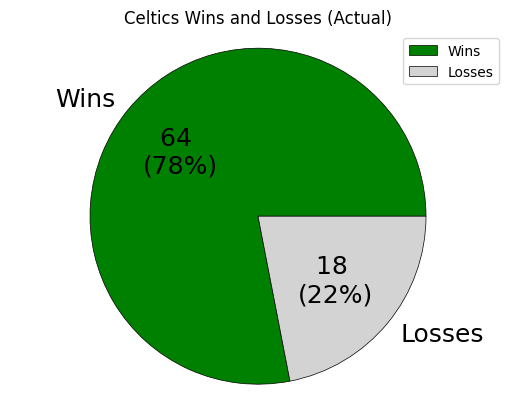

In [ ]:
# TATIANA
# create a pie chart that shows the celtics' actual number of wins and losses

# first, filter the data identify how many wins the celtics had
#celticsWins = df.loc[(df['Team'] == "Celtics") & (df['Result'] == "W"), : ]
#celticsWins

# data
labels = 'Wins', 'Losses'
sizes = [64, 18]
colors = ['green', 'lightgray']

# create a function to format a label that contains the number and percentage
def pieChartLabel(pct, allsizes):
    absolute = int(round(pct / 100.*sum(allsizes), 0))
    return f"{absolute} \n({pct:.0f}%)"

# plot
plt.title("Celtics Wins and Losses (Actual)")
plt.pie(sizes, labels=labels, colors=colors, textprops={'fontsize': 18}, wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}, autopct=lambda pct: pieChartLabel(pct, sizes))
plt.axis("equal")
plt.legend()
plt.show()

In [ ]:
# TATIANA
# refer to the CSV URL as the variable data_URL
data_URL = "https://raw.githubusercontent.com/orlandojmarin/BostonCelticsChampionshipRun/refs/heads/main/BostonCelticsDatasetPredictions.csv"

df = pd.read_csv(data_URL)

# show all 164 rows of data
df.head(164)

,Date,Team,Location,FGA,FG%,3PA,3P%,FTA,FT%,ORB,...,TRB,AST,STL,BLK,TOV,PF,PTS,Result,Predicted_PTS,Predicted_Result
0,10/25/2023,Celtics,Away,77,0.481,39,0.308,26,0.846,7,...,46,18,6,11,13,22,108,W,111,W
1,10/25/2023,Knicks,Home,97,0.371,41,0.439,26,0.538,17,...,47,24,9,0,11,22,104,L,102,L
2,10/27/2023,Celtics,Home,95,0.474,39,0.410,19,0.684,16,...,55,20,7,6,15,19,119,W,118,W
3,10/27/2023,Heat,Away,89,0.427,33,0.485,23,0.826,11,...,45,24,8,6,12,16,111,L,111,L
4,10/30/2023,Celtics,Away,102,0.500,53,0.358,7,0.714,15,...,51,31,11,6,18,21,126,W,125,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,4/11/2024,Knicks,Away,99,0.495,36,0.389,10,0.600,17,...,52,24,7,4,15,12,118,W,119,W
160,4/12/2024,Celtics,Home,104,0.519,41,0.341,13,0.692,16,...,53,34,12,1,6,20,131,W,128,W
161,4/12/2024,Hornets,Away,76,0.421,35,0.429,22,0.864,4,...,33,20,3,7,20,15,98,L,101,L
162,4/14/2024,Celtics,Home,89,0.573,32,0.500,21,0.667,10,...,48,29,10,15,17,13,132,W,134,W


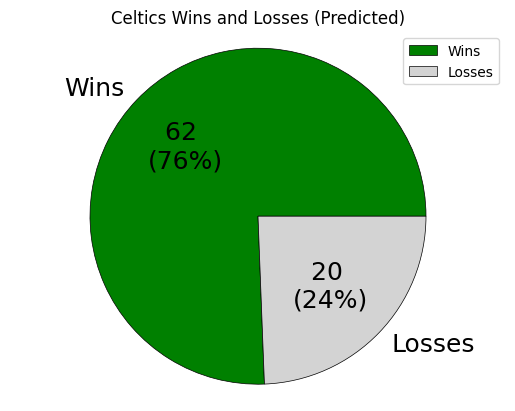

In [ ]:
# TATIANA
# create a pie chart that shows the celtics' predicted number of wins and losses

'''
# pull the data for predicted number of celtics losses
celticsPredictedLosses = df.loc[(df['Team'] == "Celtics") & (df['Predicted_Result'] == "L"), : ]
print(celticsPredictedLosses) # outputs 20 rows so 20 predicted wins
'''

# data
labels = 'Wins', 'Losses'
sizes = [62, 20]
colors = ['green', 'lightgray']

# create a function to format a label that contains the number and percentage
def pieChartLabel(pct, allsizes):
    absolute = int(round(pct / 100.*sum(allsizes), 0))
    return f"{absolute} \n({pct:.0f}%)"

# plot
plt.title("Celtics Wins and Losses (Predicted)")
plt.pie(sizes, labels=labels, colors=colors, textprops={'fontsize': 18}, wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}, autopct=lambda pct: pieChartLabel(pct, sizes))
plt.axis("equal")
plt.legend()
plt.show()

In [ ]:
# TATIANA
# refer to the CSV URL as the variable data_URL
data_URL = "https://raw.githubusercontent.com/orlandojmarin/BostonCelticsChampionshipRun/refs/heads/main/BostonCelticsDatasetPredictions.csv"

df = pd.read_csv(data_URL)

# show all 164 rows of data
df.head(164)

,Date,Team,Location,FGA,FG%,3PA,3P%,FTA,FT%,ORB,...,TRB,AST,STL,BLK,TOV,PF,PTS,Result,Predicted_PTS,Predicted_Result
0,10/25/2023,Celtics,Away,77,0.481,39,0.308,26,0.846,7,...,46,18,6,11,13,22,108,W,111,W
1,10/25/2023,Knicks,Home,97,0.371,41,0.439,26,0.538,17,...,47,24,9,0,11,22,104,L,102,L
2,10/27/2023,Celtics,Home,95,0.474,39,0.410,19,0.684,16,...,55,20,7,6,15,19,119,W,118,W
3,10/27/2023,Heat,Away,89,0.427,33,0.485,23,0.826,11,...,45,24,8,6,12,16,111,L,111,L
4,10/30/2023,Celtics,Away,102,0.500,53,0.358,7,0.714,15,...,51,31,11,6,18,21,126,W,125,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,4/11/2024,Knicks,Away,99,0.495,36,0.389,10,0.600,17,...,52,24,7,4,15,12,118,W,119,W
160,4/12/2024,Celtics,Home,104,0.519,41,0.341,13,0.692,16,...,53,34,12,1,6,20,131,W,128,W
161,4/12/2024,Hornets,Away,76,0.421,35,0.429,22,0.864,4,...,33,20,3,7,20,15,98,L,101,L
162,4/14/2024,Celtics,Home,89,0.573,32,0.500,21,0.667,10,...,48,29,10,15,17,13,132,W,134,W


In [ ]:
# TATIANA
# filter rows where the team is "Celtics" and Predicted_PTS is within ±1 of PTS, and display only the PTS and Predicted_PTS columns
celticsPredictionsWithin1 = df.loc[
    (df['Team'] == "Celtics") & (abs(df['Predicted_PTS'] - df['PTS']) <= 1),
    ['PTS', 'Predicted_PTS']
]

# show results
print(celticsPredictionsWithin1)

     PTS  Predicted_PTS
2    119            118
4    126            125
12   103            102
18   114            113
20   117            118
28   119            119
32   113            114
34   124            125
46   128            127
48   114            115
56   126            125
60   120            121
68   118            119
78   105            105
80   117            118
84   116            116
88   143            144
100  125            124
108  136            136
114  117            118
118  140            141
122  109            110
126  121            122
134  119            119
142  118            118
148  118            118


In [ ]:
# TATIANA
# filter rows where the team is not "Celtics" and Predicted_PTS is within ±1 of PTS, and display only the PTS and Predicted_PTS columns
opponentsPredictionsWithin1 = df.loc[
    (df['Team'] != "Celtics") & (abs(df['Predicted_PTS'] - df['PTS']) <= 1),
    ['PTS', 'Predicted_PTS']
]

# show results
print(opponentsPredictionsWithin1)

     PTS  Predicted_PTS
3    111            111
5    107            106
25   100            100
33   103            102
43   113            114
49    97             98
53   119            120
55   108            109
57   115            116
63   101            101
65   127            127
69   101            100
75   135            134
87   110            111
91   115            114
93   112            112
105  106            106
115   99             99
117  110            111
151  100            101
153  100            101
159  118            119
163  122            122


In [ ]:
# TATIANA
# filter rows where the team is "Celtics" and Predicted_PTS is within ±5 of PTS, and display only the PTS and Predicted_PTS columns
celticsPredictionsWithin5 = df.loc[
    (df['Team'] == "Celtics") & (abs(df['Predicted_PTS'] - df['PTS']) <= 5),
    ['PTS', 'Predicted_PTS']
]

# show results
print(celticsPredictionsWithin5)

     PTS  Predicted_PTS
0    108            111
2    119            118
4    126            125
10   109            106
12   103            102
..   ...            ...
154  124            126
156   91             94
158  109            112
160  131            128
162  132            134

[67 rows x 2 columns]


In [ ]:
# TATIANA
# filter rows where the team is not "Celtics" and Predicted_PTS is within ±5 of PTS, and display only the PTS and Predicted_PTS columns
opponentsPredictionsWithin5 = df.loc[
    (df['Team'] != "Celtics") & (abs(df['Predicted_PTS'] - df['PTS']) <= 5),
    ['PTS', 'Predicted_PTS']
]

# show results
print(opponentsPredictionsWithin5)

     PTS  Predicted_PTS
1    104            102
3    111            111
5    107            106
7    104            107
9    114            110
..   ...            ...
153  100            101
155  107            104
159  118            119
161   98            101
163  122            122

[72 rows x 2 columns]


In [ ]:
# TATIANA
# filter rows where the team is "Celtics" and Predicted_PTS is within ±10 of PTS, and display only the PTS and Predicted_PTS columns
celticsPredictionsWithin10 = df.loc[
    (df['Team'] == "Celtics") & (abs(df['Predicted_PTS'] - df['PTS']) <= 10),
    ['PTS', 'Predicted_PTS']
]

# show results
print(celticsPredictionsWithin10)

     PTS  Predicted_PTS
0    108            111
2    119            118
4    126            125
6    155            145
8    124            117
..   ...            ...
154  124            126
156   91             94
158  109            112
160  131            128
162  132            134

[77 rows x 2 columns]


In [ ]:
# TATIANA
# filter rows where the team is not "Celtics" and Predicted_PTS is within ±10 of PTS, and display only the PTS and Predicted_PTS columns
opponentsPredictionsWithin10 = df.loc[
    (df['Team'] != "Celtics") & (abs(df['Predicted_PTS'] - df['PTS']) <= 10),
    ['PTS', 'Predicted_PTS']
]

# show results
print(opponentsPredictionsWithin10)

     PTS  Predicted_PTS
1    104            102
3    111            111
5    107            106
7    104            107
9    114            110
..   ...            ...
153  100            101
155  107            104
159  118            119
161   98            101
163  122            122

[80 rows x 2 columns]


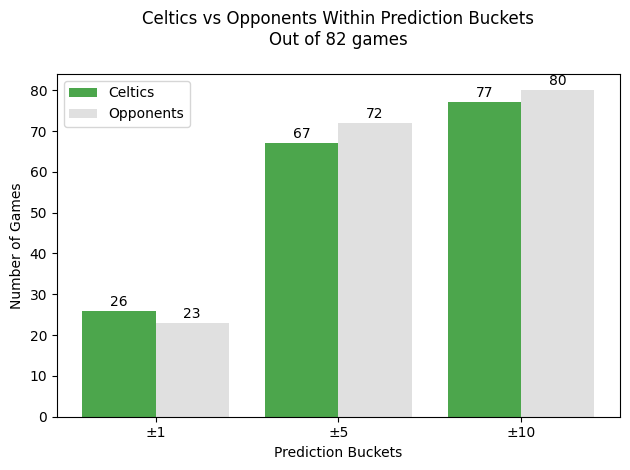

In [ ]:
# TATIANA
# create a double bar chart that shows how many games

import numpy as np
import matplotlib.pyplot as plt

# refer to the CSV URL as the variable data_URL
data_URL = "https://raw.githubusercontent.com/orlandojmarin/BostonCelticsChampionshipRun/refs/heads/main/BostonCelticsDatasetPredictions.csv"

df = pd.read_csv(data_URL)

# show all 164 rows of data
df.head(164)

# calculate the number of games within each prediction bucket for Celtics
celtics_within_1 = len(df.loc[(df['Team'] == "Celtics") & (abs(df['Predicted_PTS'] - df['PTS']) <= 1)])
celtics_within_5 = len(df.loc[(df['Team'] == "Celtics") & (abs(df['Predicted_PTS'] - df['PTS']) <= 5)])
celtics_within_10 = len(df.loc[(df['Team'] == "Celtics") & (abs(df['Predicted_PTS'] - df['PTS']) <= 10)])

# calculate the number of games within each prediction bucket for Opponents
opponents_within_1 = len(df.loc[(df['Team'] != "Celtics") & (abs(df['Predicted_PTS'] - df['PTS']) <= 1)])
opponents_within_5 = len(df.loc[(df['Team'] != "Celtics") & (abs(df['Predicted_PTS'] - df['PTS']) <= 5)])
opponents_within_10 = len(df.loc[(df['Team'] != "Celtics") & (abs(df['Predicted_PTS'] - df['PTS']) <= 10)])

# data for the bar chart
buckets = ['±1', '±5', '±10']
celtics_counts = [celtics_within_1, celtics_within_5, celtics_within_10]
opponents_counts = [opponents_within_1, opponents_within_5, opponents_within_10]

# bar positions
x = np.arange(len(buckets))
bar_width = 0.4

# plot the bars
bars_celtics = plt.bar(x - bar_width / 2, celtics_counts, width=bar_width, label='Celtics', color='green', alpha=0.7)
bars_opponents = plt.bar(x + bar_width / 2, opponents_counts, width=bar_width, label='Opponents', color='lightgray', alpha=0.7)

# add value labels on top of each bar
for bar in bars_celtics:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{int(bar.get_height())}',
             ha='center', va='bottom', fontsize=10, color='black')

for bar in bars_opponents:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{int(bar.get_height())}',
             ha='center', va='bottom', fontsize=10, color='black')

# add labels and title
plt.xticks(x, buckets)
plt.xlabel('Prediction Buckets')
plt.ylabel('Number of Games')
plt.title('Celtics vs Opponents Within Prediction Buckets\nOut of 82 games\n')
plt.legend()

# show the plot
plt.tight_layout()
plt.show()